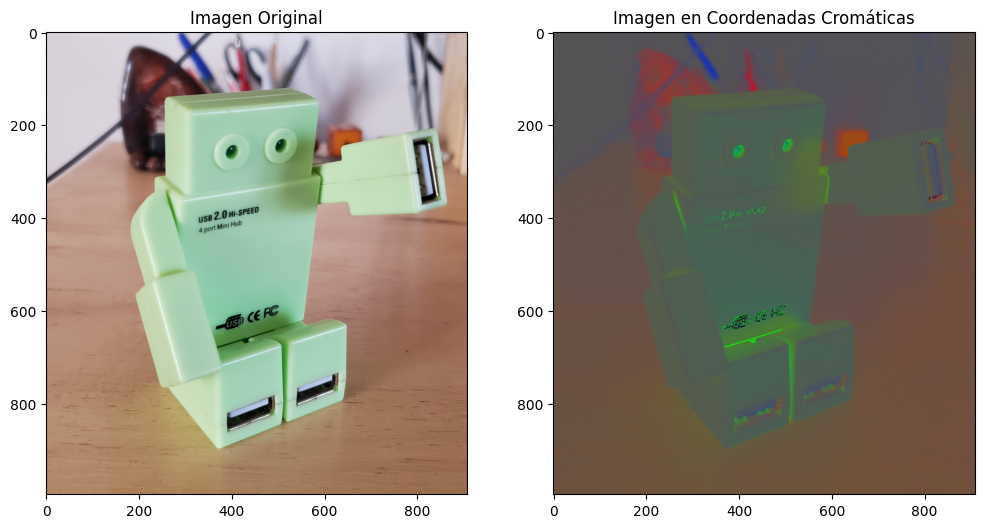

Imagen guardada en ./chromatic_image.png


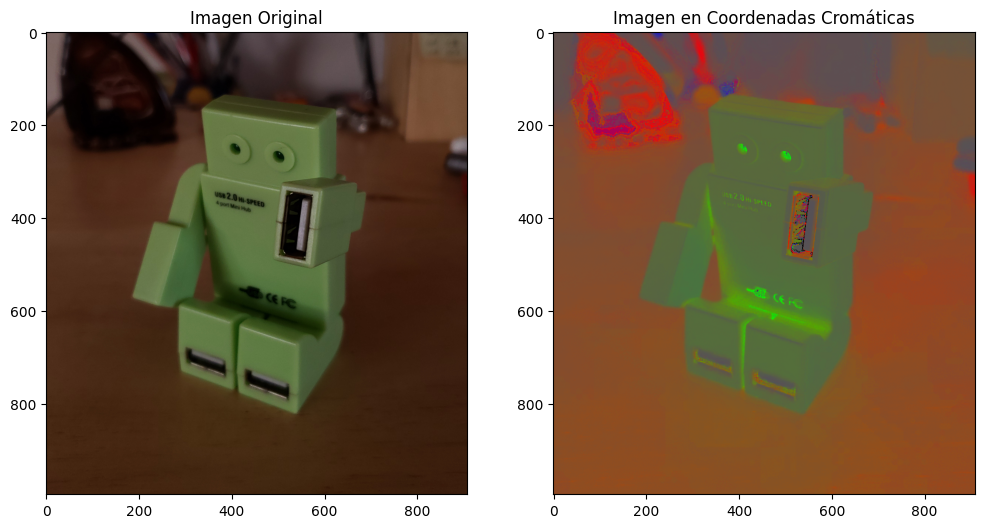

Imagen guardada en ./chromatic_image.png


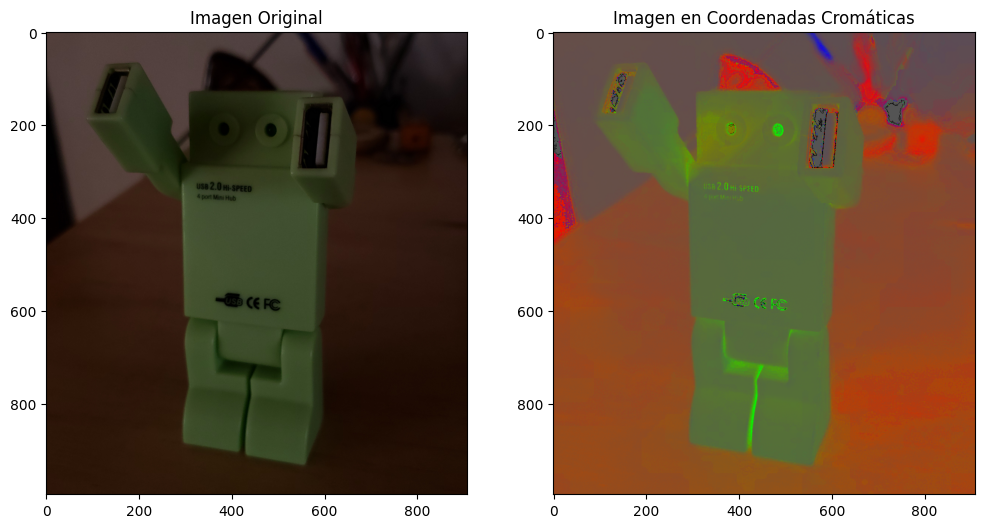

Imagen guardada en ./chromatic_image.png


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_chromatic_coordinates(image):
    sum_channels = np.sum(image, axis=2, keepdims=True)
    chromatic_coords = image / (sum_channels + 1e-6)  # Evitar división por cero
    return chromatic_coords

def process_image(image_path):
    # Lee la imagen de entrada
    image = cv2.imread(image_path)
    if image is None:
        print("Error al leer la imagen.")
        return
    
    # Convierte a coordenadas cromáticas
    chromatic_image = convert_to_chromatic_coordinates(image)

    # Multiplica por 255 y convierte a un tipo de datos adecuado
    chromatic_image = (chromatic_image * 255).astype(np.uint8)

    # Muestra las imágenes originales y convertidas
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(chromatic_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen en Coordenadas Cromáticas')

    plt.show()

    # Guarda la imagen resultante
    output_path = './chromatic_image.png'
    result = cv2.imwrite(output_path, chromatic_image)
    if result:
        print(f"Imagen guardada en {output_path}")
    else:
        print("Error al guardar la imagen.")

# Define la ruta de la imagen de entrada
image_path = './Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png'
image_path1 = './Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png'
image_path2 = './Material_TPs/TP1/coord_cromaticas/CoordCrom_3.png'

# Procesa la imagen
process_image(image_path)
process_image(image_path1)
process_image(image_path2)

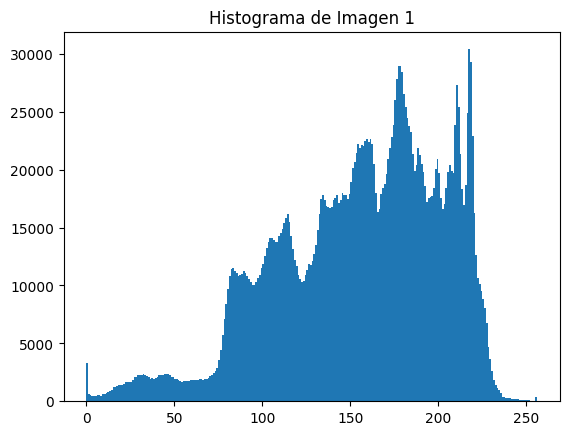

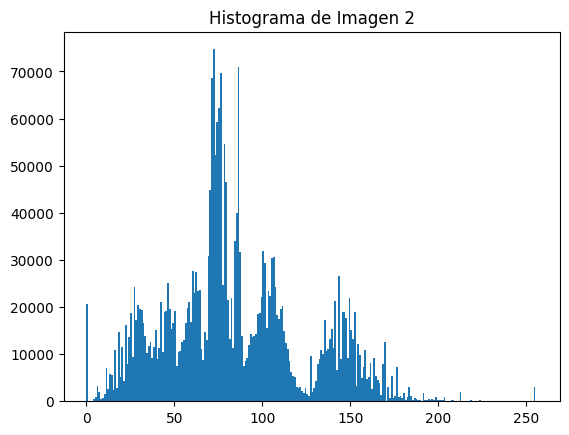

In [3]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.show()

img1 = cv2.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png')
img2 = cv2.imread('./chromatic_image.png')
plot_histogram(img1, 'Histograma de Imagen 1')
plot_histogram(img2, 'Histograma de Imagen 2')


In [4]:
def white_patch_retinex(image):
    max_rgb = np.max(image, axis=(0, 1))
    white_balanced = (image / max_rgb) * 255
    return white_balanced

image = cv2.imread('./Material_TPs/TP1/white_patch/test_blue.png')
white_balanced_image = white_patch_retinex(image)
cv2.imwrite('./Material_TPs/TP1/white_patch/test_blue2.png', white_balanced_image)


True

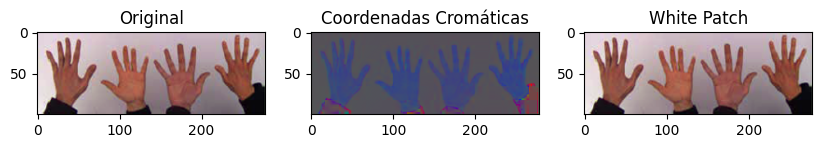

In [5]:
original = cv2.imread('./Material_TPs/TP1/white_patch/test_blue.png')
chromatic_image = convert_to_chromatic_coordinates(original)
white_balanced_image = white_patch_retinex(original)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Coordenadas Cromáticas')
plt.imshow(chromatic_image)

plt.subplot(1, 3, 3)
plt.title('White Patch')
plt.imshow(cv2.cvtColor(white_balanced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()


El algoritmo White Patch es una técnica de balance de blancos que ajusta los colores de una imagen basándose en el supuesto de que la región más brillante de la imagen debería ser blanca. Aunque este método puede funcionar bien en muchas situaciones, puede presentar problemas sobre todo si la imagen no contiene pixeles de referencia que esten en dicho espectro de color.

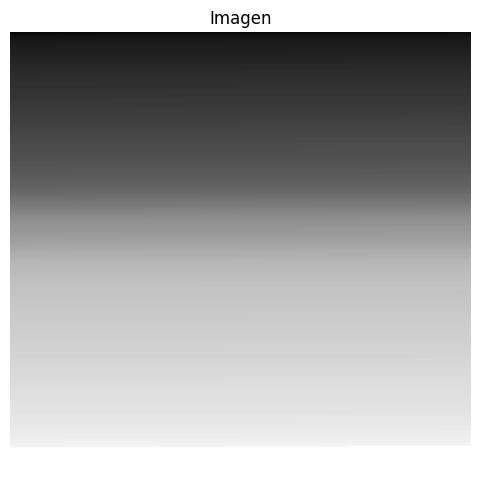

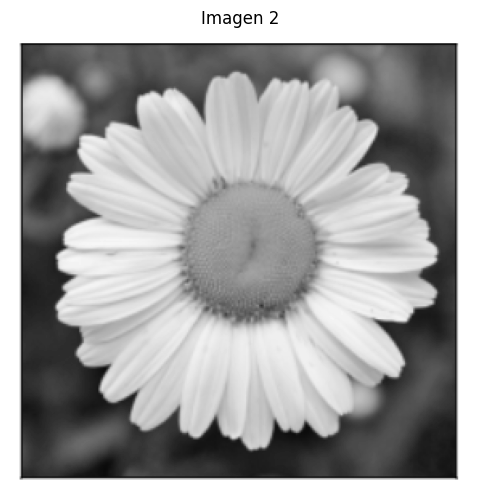

In [18]:
# Para las imagenes img1_tp.png y img2_tp.png leerlas con OpenCV en 
# escala de grises y visualizarlas.

img1_tp = cv2.imread('./Material_TPs/TP1/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2_tp = cv2.imread('./Material_TPs/TP1/img2_tp.png', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', img1_tp)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.imshow('image', img2_tp)
cv2.waitKey(0) 
cv2.destroyAllWindows()

# Visualizar la imagen 1
plt.figure(figsize=(8, 6))
plt.imshow(img1_tp, cmap='gray')
plt.axis('off')
plt.title('Imagen')
plt.show()

# Visualizar la imagen 2
plt.figure(figsize=(8, 6))
plt.imshow(img2_tp, cmap='gray')
plt.axis('off')
plt.title('Imagen 2')
plt.show()


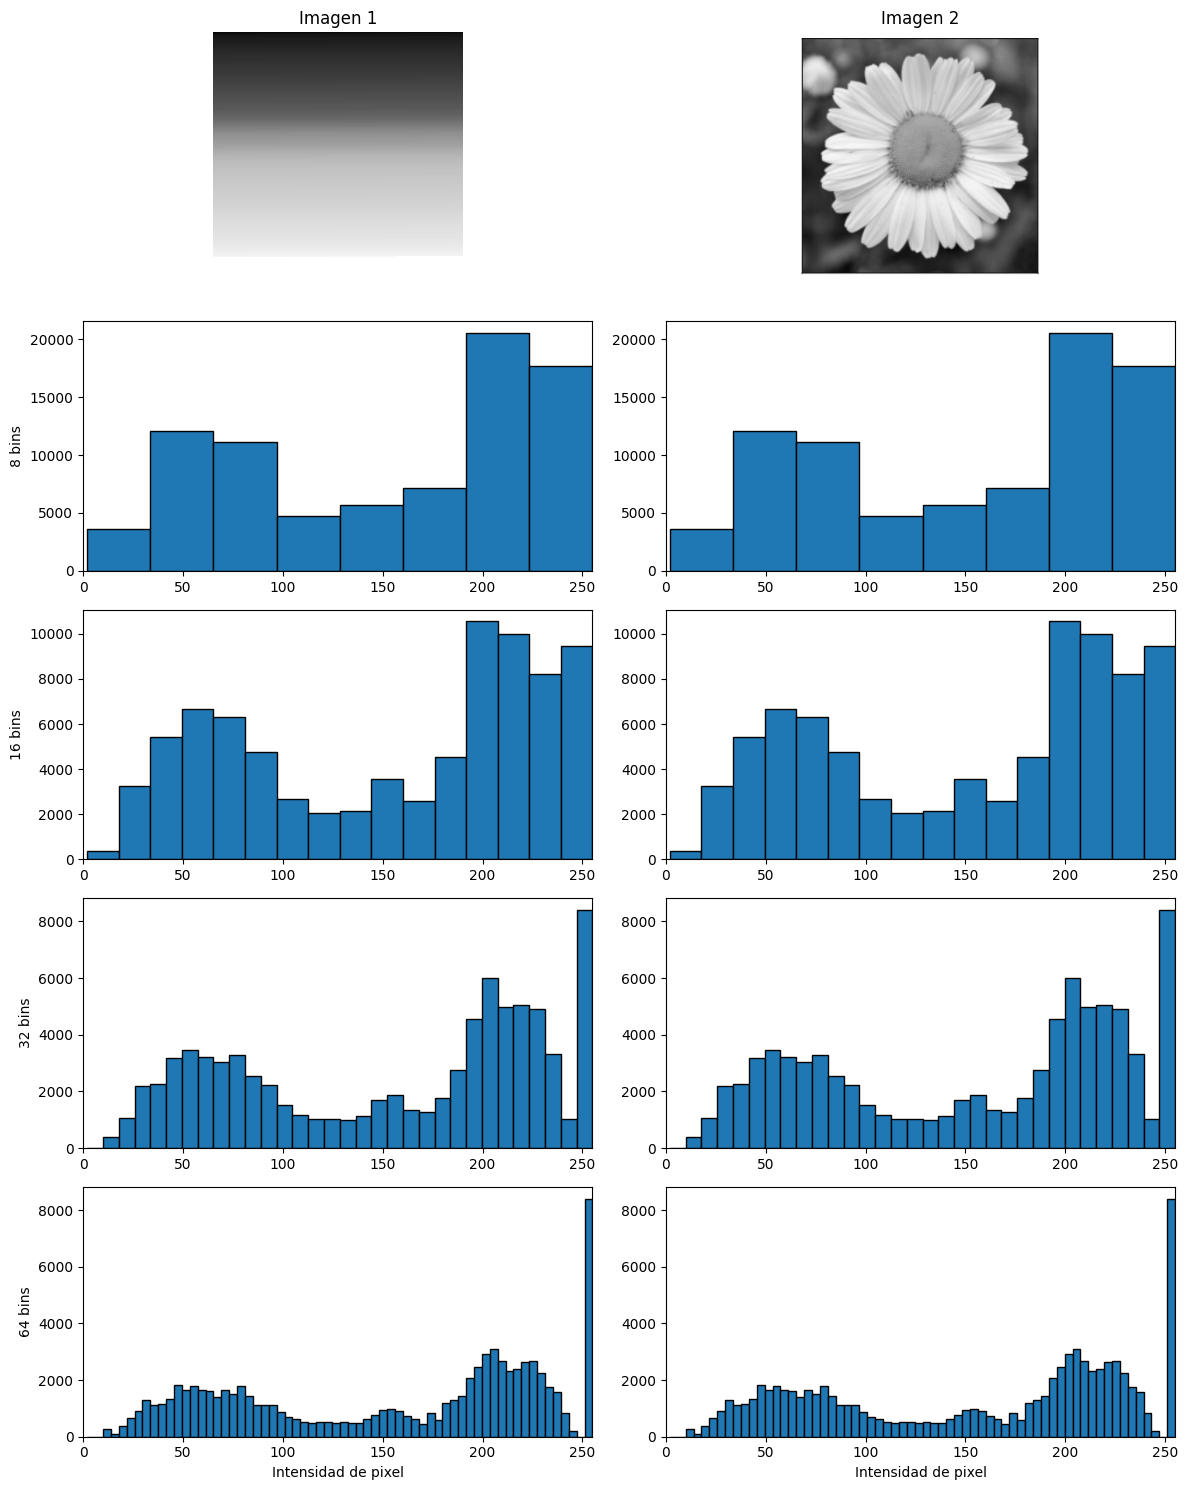

In [19]:
import cv2
import matplotlib.pyplot as plt

# Leer las imágenes en escala de grises
img1_tp = cv2.imread('./Material_TPs/TP1/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2_tp = cv2.imread('./Material_TPs/TP1/img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Verificar si las imágenes se cargaron correctamente
if img1_tp is None:
    print("Error al cargar img1_tp.png")
if img2_tp is None:
    print("Error al cargar img2_tp.png")

# Definir el número de bins
bins = [8, 16, 32, 64]
images = [img1_tp, img2_tp]
num_images = len(images)
num_bins = len(bins)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 3 * (1 + num_bins)))

# Graficar las imágenes y sus histogramas
for i, image in enumerate(images):
    # Mostrar la imagen
    plt.subplot(num_bins + 1, num_images, i + 1)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title(f"Imagen {i + 1}")

    # Mostrar los histogramas
    for j, bin_count in enumerate(bins):
        plt.subplot(num_bins + 1, num_images, (j + 1) * num_images + i + 1)
        plt.hist(image.flatten(), bins=bin_count, edgecolor="black")
        plt.xlim(0, 255)
        if i == 0:
            plt.ylabel(f"{bin_count} bins")
        if j == num_bins - 1:
            plt.xlabel("Intensidad de pixel")

plt.tight_layout()
plt.show()


En los histogramas planteados arriba podemos ver que, dadas dos imagenes completamente distintas, los histogramas con los que se las representa son exactamente iguales sin importar la cantidad de bins que se plantee. Por lo mencionado podemos concluir que, en caso de tener que entrenar un modelo de clasificación/detección de imágenes, no resulta suficiente tomar como feature estos histogramas puesto que pueden no ser lo suficientemente descriptivos de la imágen en cuestión.

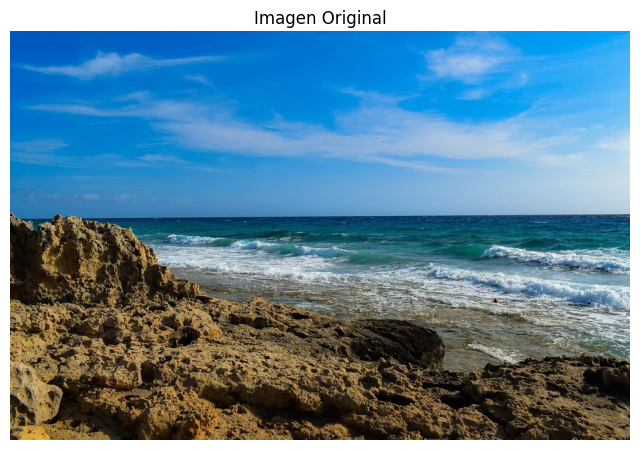

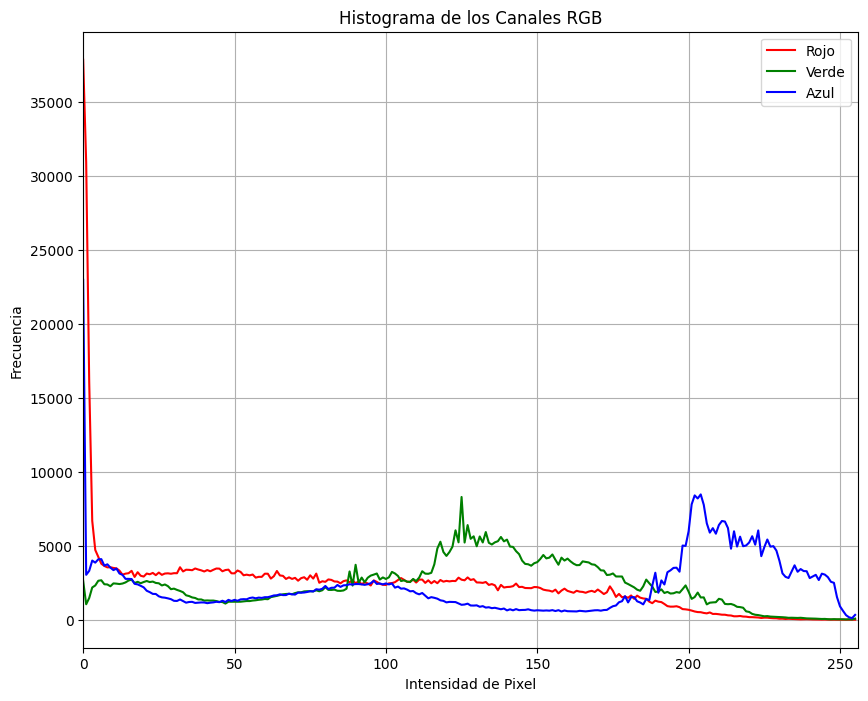

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
image_path = './Material_TPs/TP1/segmentacion.png'
image = cv2.imread(image_path)

# Convertir la imagen a RGB (OpenCV carga las imágenes en formato BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizar la imagen
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

# Calcular y mostrar el histograma de los canales RGB
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Canales RGB')
plt.legend(['Rojo', 'Verde', 'Azul'])
plt.grid()
plt.show()


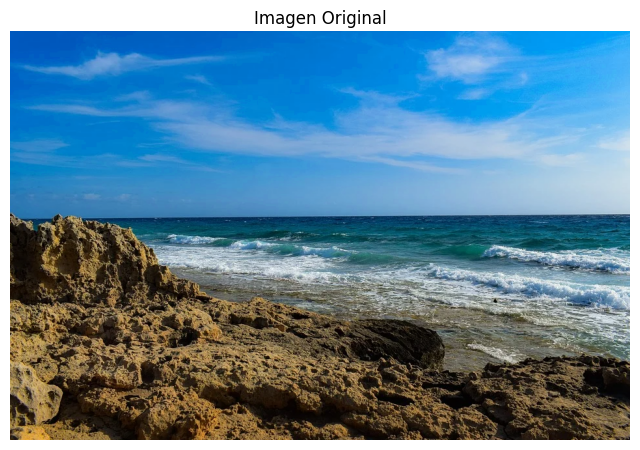

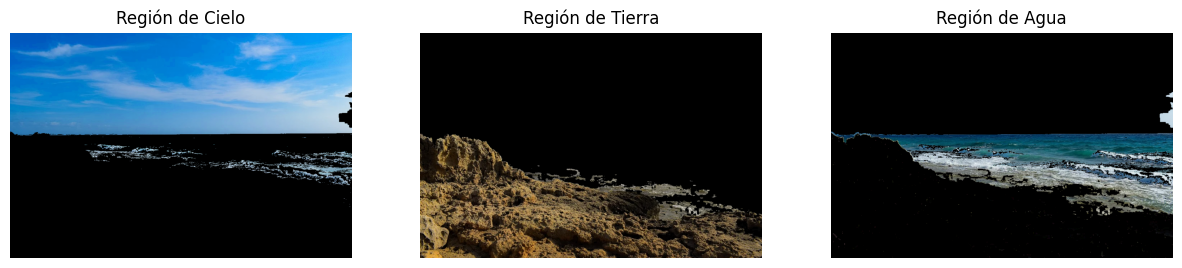

In [11]:
# Segmentar la imagen

# Convertir la imagen al espacio de color HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Visualizar la imagen
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.title('Imagen Original')
plt.show()

# Define los rangos de colores para cada región (agua, cielo y tierra)
lower_sky = np.array([95, 40, 170])
upper_sky = np.array([110, 255, 255])

lower_sand = np.array([0, 0, 0])
upper_sand = np.array([27, 255, 255])

# Crear mascaras
mask_sand = cv2.inRange(image_hsv, lower_sand, upper_sand)
mask_sky = cv2.inRange(image_hsv, lower_sky, upper_sky)

# La mascara del oceano es todo lo que no está dentro de la mascara roca y mascara cielo
mask_ocean = cv2.bitwise_and(cv2.bitwise_not(mask_sand), cv2.bitwise_not(mask_sky))

# Aplica las máscaras a la imagen original
segmented_sky = cv2.bitwise_and(image_hsv, image_hsv, mask=mask_sky)
segmented_sand = cv2.bitwise_and(image_hsv, image_hsv, mask=mask_sand)
segmented_ocean = cv2.bitwise_and(image_hsv, image_hsv, mask=mask_ocean)

# Visualizar las regiones segmentadas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(segmented_sky, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.title('Región de Cielo')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(segmented_sand, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.title('Región de Tierra')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmented_ocean, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.title('Región de Agua')
plt.show()
